In [1]:
import PointNet
import VoxNet
import ModelNet
#import KITTI
import ISO

model = VoxNet.VoxNet(classes=10, load_weights=True)
predict = VoxNet.predict
x_train, y_train, x_test, y_test = ModelNet.loadmodelnet(classes=10, vox=True)

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 14, 14, 14, 32)    4032      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 14, 32)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 14, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 12, 12, 32)    27680     
_________________________________________________________________


Voxelizing Test: 100%|██████████| 1514/1514 [00:08<00:00, 169.90it/s]

activation_2 (Activation)    (None, 12, 12, 12, 32)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 6, 6, 32)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 6, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               884864    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [2]:
"""
import numpy as np
import h5py

train_path = 'Data/KITTI_train/kitti_train_3.h5'
test_path = 'Data/KITTI_train/kitti_test_3.h5'

f = h5py.File(train_path, 'r')
X_train = np.asarray(list(f['data']))
Y_train = np.asarray(list(f['label']))

f = h5py.File(test_path, 'r')
X_test = np.asarray(list(f['data']))
Y_test = np.asarray(list(f['label']))
import copy
def norm(dim, val):
    i = copy.deepcopy(val)
    i -= np.min(i, axis=0)
    k = max(i[:,0]) - min(i[:,0])
    i[:,0] /= k
    k = max(i[:,1]) - min(i[:,1])
    i[:,1] /= k
    k = max(i[:,2]) - min(i[:,2])
    i[:,2] /= k
    return i*(dim-1)

X_test_points = [norm(32, i) for i in X_test]
X_train_points = [norm(32, i) for i in X_train]

# now we need to voxelize that point cloud...
def voxelize(dim, data):
    data = np.asarray([[int(i[0]), int(i[1]), int(i[2])] for i in data])
    data = np.unique(data, axis=1)
    retval = np.zeros((dim, dim, dim))
    for i in data:
        retval[i[0]][i[1]][i[2]] = 1
    retval = np.asarray([retval])
    return retval
    
X_train = [voxelize(32, i) for i in X_train_points]
X_train = np.asarray(X_train)
X_train = np.reshape(X_train, (-1, 32, 32, 32, 1))

X_test = [voxelize(32, i) for i in X_test_points]
X_test = np.asarray(X_test)
X_test = np.reshape(X_test, (-1, 32, 32, 32, 1))

print X_train.shape
print X_test.shape
"""

"\nimport numpy as np\nimport h5py\n\ntrain_path = 'Data/KITTI_train/kitti_train_3.h5'\ntest_path = 'Data/KITTI_train/kitti_test_3.h5'\n\nf = h5py.File(train_path, 'r')\nX_train = np.asarray(list(f['data']))\nY_train = np.asarray(list(f['label']))\n\nf = h5py.File(test_path, 'r')\nX_test = np.asarray(list(f['data']))\nY_test = np.asarray(list(f['label']))\nimport copy\ndef norm(dim, val):\n    i = copy.deepcopy(val)\n    i -= np.min(i, axis=0)\n    k = max(i[:,0]) - min(i[:,0])\n    i[:,0] /= k\n    k = max(i[:,1]) - min(i[:,1])\n    i[:,1] /= k\n    k = max(i[:,2]) - min(i[:,2])\n    i[:,2] /= k\n    return i*(dim-1)\n\nX_test_points = [norm(32, i) for i in X_test]\nX_train_points = [norm(32, i) for i in X_train]\n\n# now we need to voxelize that point cloud...\ndef voxelize(dim, data):\n    data = np.asarray([[int(i[0]), int(i[1]), int(i[2])] for i in data])\n    data = np.unique(data, axis=1)\n    retval = np.zeros((dim, dim, dim))\n    for i in data:\n        retval[i[0]][i[1]][i[2

<IPython.core.display.Javascript object>


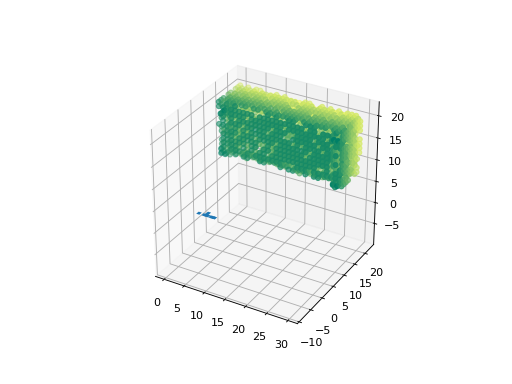

1472/1514 [============================>.] - ETA: 0s[1.5391310221925278, 0.7648612946626218]


In [3]:
import numpy as np

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

x_test = np.asarray(x_test)
x_test = np.reshape(x_test, (-1, 32, 32, 32))

x_train = np.asarray(x_train)
x_train = np.reshape(x_train, (-1, 32, 32, 32))


voxed = []
for i in range(32):
    for j in range(32):
        for k in range(32):
            if(x_train[0][i][j][k] == 1):
                voxed.append([i,j,k])

def show_fig(inp):
    inp = np.asarray(inp)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect('equal')

    X,Y,Z = np.hsplit(inp,3)
    scat = ax.scatter(X,Y,Z,c=Y,cmap='summer')
    
    max_range = np.asarray([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()-X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()-Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()-Z.min())

    for xb,yb,zb in zip(Xb,Yb,Zb):
        ax.plot([xb],[yb],[zb], 'r')

    plt.grid()
    plt.show()
    
show_fig(voxed)

x_test = np.asarray(x_test)
x_test = np.reshape(x_test, (-1, 32, 32, 32,1))

x_train = np.asarray(x_train)
x_train = np.reshape(x_train, (-1, 32, 32, 32,1))

print model.evaluate(x_test, y_test)


predict = VoxNet.predict

In [4]:
from sklearn.metrics import classification_report
import numpy as np
#y_test = np.argmax(y_test, axis=1)
y_pred = model.predict_classes(x_test)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
#print y_test[0]

1280/1514 [========================>.....] - ETA: 0s             precision    recall  f1-score   support

          0       1.00      0.55      0.71        84
          1       0.76      0.91      0.83       172
          2       0.83      0.93      0.88       168
          3       0.65      0.36      0.46       144
          4       0.55      0.70      0.61       154
          5       0.92      0.89      0.90       160
          6       0.60      0.37      0.46       140
          7       0.84      0.94      0.89       166
          8       0.70      0.86      0.78       160
          9       0.86      0.92      0.89       166

avg / total       0.77      0.76      0.75      1514



In [5]:
def get_saliency(inp, model):
    sal = np.zeros((6,6,6))
    init_conf, init_cl = predict(inp, model)
    for i in range(6):
        for j in range(6):
            for k in range(6):
                val = copy.deepcopy(inp[i][j][k])
                inp[i][j][k] = 0.0 #1 - inp[i][j][k]
                conf, cl = predict(inp, model)
                sal[i][j][k] = 0.01 + abs(init_conf - conf) #abs(init_conf - conf)*(val)*10 + 1*(val)
                inp[i][j][k] = val
                
    sal = abs(sal)
    return np.asarray([sal])

In [6]:

    
def ISO_vox(inp, label, model, trials=1, r_passes=10, retocc=False, monotonic=False):
    inp = np.squeeze(inp)
    model_in = copy.deepcopy(inp)
    in_adver = copy.deepcopy(inp)
    true_lbl, true_lbl_num = label, np.argmax(label)
    
    init_conf, init_cl = predict(model_in, model)
    if(init_cl != true_lbl_num):
        #print(init_cl, true_lbl_num)
        return 0,0,0
    
    latent = get_saliency(model_in, model) # get_max_pool(model, model_in)
    #print latent.shape
    saliency_values = [] # this calculates the saliency of all values in the voxelization
    already_counted_indexes = []
    """
    okay so what is happening here is we are taking every point 
    and we give it t
    """
    x,y,z = np.nonzero(inp)
    list_ones = zip(x,y,z)
    
    for i in list_ones: 
        a,b,c = i
        assert(inp[a][b][c] == 1)
        x,y,z=a/5.4,b/5.4,c/5.4
        if(not([int(i[0]), int(i[1]), int(i[2])] in already_counted_indexes)):
            already_counted_indexes.append([int(x), int(y), int(z)])
            try:
                saliency_values.append(max(latent[0][int(x)][int(y)][int(z)]))
            except:
                saliency_values.append(latent[0][int(x)][int(y)][int(z)])
    saliency_values += 2*abs(min(saliency_values))
    saliency_values /= sum(saliency_values)
    #print saliency_values
    
    manipulations = []
    inds_changed = []
    size = len(list_ones)
    while(True):
        if(in_adver.sum() == 0):
            print "ZERO'D OUT"
            return 1024, 0, 0
        #Make a manipulation
        #print("Here is len of sal: ",len(saliency_values))
        ind = np.random.choice(range(len(saliency_values)), p=saliency_values)
        #print ind
        i,j,k = list_ones[ind]
        if(in_adver[i][j][k] == 1.0):
            in_adver[i][j][k] = 0.0
            conf, cl = predict(in_adver, model)
            if(conf > init_conf and monotonic):
                in_adver[i][j][k] = 1.0
                continue
            manipulations.append([i,j,k])
            sys.stdout.write("Points occluded: %s conf: %s \r"%(len(manipulations), conf))
            sys.stdout.flush()
            if(cl != true_lbl_num):
                break
            if(in_adver.sum() == 0):
                print "Zeroed out"
                return 1024,0,0
            #print saliency_values
            if(math.isnan(float(sum(saliency_values)))):
                #print saliency_values
                #print "Failed A"
                assert(False)
            #print "ssss", in_adver.sum(), "ssssss"
            #print "++++", saliency_values[ind], "++++++"
            saliency_values[ind] = 0
            #print "   == = = == = ="
            #print float(sum(saliency_values))
            #print "   == = = == = ="
            saliency_values /= float(sum(saliency_values))
            #update saliency
            if(math.isnan(float(sum(saliency_values)))):
                #print saliency_values
                #print "Failed B"
                assert(False)
                x,y,z = np.nonzero(in_adver)
                list_ones = zip(x,y,z)
                saliency_values = []
                for i in list_ones: 
                    a,b,c = i
                    x,y,z=a/5.4,b/5.4,c/5.4
                    if(not([int(i[0]), int(i[1]), int(i[2])] in already_counted_indexes)):
                        already_counted_indexes.append([int(x), int(y), int(z)])
                        saliency_values.append(latent[0][int(x)][int(y)][int(z)])
                #saliency_values += 2*abs(min(saliency_values))
                saliency_values = np.asarray(saliency_values)
                saliency_values /= sum(saliency_values)
            
        else:
            assert(False)
        
    for _ in range(r_passes):
        indices = []
        ind_value = 0
        for i in manipulations:
            in_adver[i[0]][i[1]][i[2]] = 1.0
            conf, cl = predict(in_adver, model)
            if(cl != true_lbl_num):
                indices.append(ind_value)
            else:
                in_adver[i[0]][i[1]][i[2]] = 0.0
            ind_value += 1
        for i in sorted(indices, reverse=True):
            del manipulations[i]
            
    return len(manipulations), manipulations, in_adver
    

In [7]:
import sys
import copy
from tqdm import tqdm
from tqdm import trange
import time
import numpy as np
import math
get_max_pool = VoxNet.get_max_pool
times = []
scores = []
inputs = []
adversaries = []
zeros = 0
samples = 10
for i in trange(samples):
    index = i
    start = time.time()
    a,b,c = ISO_vox(x_test[index], y_test[index], model)
    end = time.time()
    scores.append(a)
    if(a == 0):
        zeros += 1
    else:
        times.append(end-start)
        inputs.append(b)
        adversaries.append(c)
    #a,b,c = ISO_vox(x_test[index], y_test[index], model)
    

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:04<00:37,  4.16s/it]

 20%|██        | 2/10 [00:05<00:23,  2.99s/it]

 40%|████      | 4/10 [00:12<00:18,  3.02s/it]

 50%|█████     | 5/10 [00:17<00:17,  3.42s/it]

 60%|██████    | 6/10 [00:20<00:13,  3.44s/it]

 70%|███████   | 7/10 [00:25<00:11,  3.70s/it]

 80%|████████  | 8/10 [00:29<00:07,  3.73s/it]

100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


In [8]:
print scores

[106, 52, 0, 245, 158, 255, 192, 30, 168, 0]


In [9]:
plt.hist(times)
plt.show()
print np.median(times)
print zeros

4.054006934165955
2


In [10]:
def random_point(inp, label, model):
    inp = np.squeeze(inp)
    model_in = copy.deepcopy(inp)
    in_adver = copy.deepcopy(inp)
    true_lbl, true_lbl_num = label, np.argmax(label)
    
    initial_pred = predict(model_in, model)
    if(np.argmax(initial_pred) != true_lbl_num):
        print(np.argmax(initial_pred), true_lbl_num)
        return 1024,0,0,0
    
    
    i,j,k = np.nonzero(inp)
    list_ones = zip(i,j,k)
    
    order_points = np.random.permutation(len(list_ones))
    removed = []
    removed_ind = []
    manipulations = []
    saliency_values = np.ones(len(list_ones))/float(len(list_ones))
    for i in order_points:
        ind = np.random.choice(range(len(saliency_values)), p=saliency_values)
        i,j,k = list_ones[ind]
        if(in_adver[i][j][k] == 1.0):
            in_adver[i][j][k] = 0.0
            manipulations.append([i,j,k])
            conf, cl = predict(in_adver, model)
            sys.stdout.write("Points occluded: %s conf: %s \r"%(len(manipulations), conf))
            sys.stdout.flush()
            if(cl != true_lbl_num):
                return len(manipulations), inp, removed, removed_ind
            saliency_values[ind] =0
            saliency_values /= sum(saliency_values)
        else:
            if(in_adver.sum() == 0):
                print "ZERO'D OUT"
                return 1024, 0, 0
            assert(False)
    return len(manipulations), inp, removed, removed_ind 
        
import sys
import copy
from tqdm import tqdm
from tqdm import trange
import time
import numpy as np

times_rand = []
scores_rand = []
inputs_rand = []
adversaries_rand = []
zeros_rand = 0
#order = np.random.permutation(len(Y_test))
for i in trange(10):
    index = i
    start = time.time()
    a,b,c,d = random_point(x_test[index], y_test[index], model)
    end = time.time()
    scores_rand.append(a)
    if(a == 0):
        zeros_rand += 1
    else:
        times_rand.append(end-start)
        inputs_rand.append(b)
        adversaries_rand.append(c)

  0%|          | 0/10 [00:00<?, ?it/s]

============================== 0 =========================


 10%|█         | 1/10 [00:02<00:19,  2.12s/it]

============================== 1 =========================
(1, 2)
============================== 2 =========================
(1, 6)
============================== 3 =========================
(1, 9)
============================== 4 =========================
(1, 9)
============================== 5 =========================
(1, 8)
============================== 6 =========================
(1, 9)
============================== 7 =========================
(1, 7)
============================== 8 =========================
(1, 2)
============================== 9 =========================


100%|██████████| 10/10 [00:02<00:00,  4.68it/s]

(1, 0)


In [11]:
print np.mean(times_rand)
print np.mean(times)

0.21339066028594972
4.16475036740303


<IPython.core.display.Javascript object>


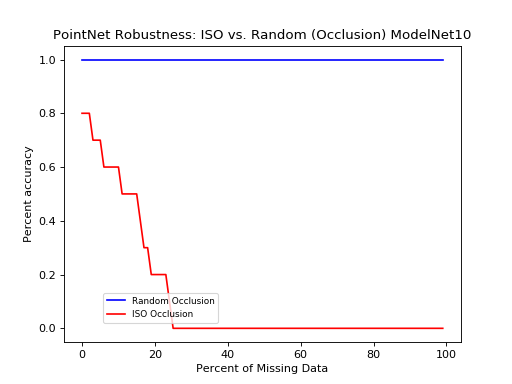

In [12]:
percent_correct_random = 1.00
percent_correct_optimized = 1.00

potr = [] # percent over time random
poto = []

opt_manip_dist = scores
rand_manip_dist = scores_rand
sono = sorted(opt_manip_dist)
srno = sorted(rand_manip_dist)

samples = 10.0

for i in range(100):
    #print 2048.0*(i/100.0)
    #print 2048.0*(i+1/100.0)
    for x in srno:
        if(x <= 1024.0*(i/100.0) and x > 1024.0*((i-1)/100.0)):
            percent_correct_random -= 1.0/samples
            
    for x in sono:
        if(x <= 1024.0*(i/100.0) and x > 1024.0*((i-1)/100.0)):
            percent_correct_optimized -= 1.0/samples
            
    potr.append(percent_correct_random)
    poto.append(percent_correct_optimized)
    
fig1 = plt.figure()
plt.title('PointNet Robustness: ISO vs. Random (Occlusion) ModelNet10')
ax1 = fig1.add_subplot(111)

plt.plot(potr[0:], label="Random Occlusion", c='b')
plt.plot(poto[0:], label="ISO Occlusion", c='r')

#plt.scatter(pnx*100,pny, c='b',label='Report from Qi. et. al 2017')

plt.ylabel("Percent accuracy")
plt.xlabel("Percent of Missing Data")

params = {'legend.fontsize' : 8}
plt.rcParams.update(params)
plt.legend(loc=1, bbox_to_anchor=(0.4,0.18))
plt.show()